In [75]:
import numpy as np
import pandas as pd
import pickle
from tsfeatures import *
import xgboost as xgb

### Testing data

#### M4 

In [61]:
monthly_train = pd.read_csv('data/data_m4/Monthly-train.csv', nrows=4000).set_index('V1')

In [62]:
list_series_m4 = [ts.dropna().to_numpy() for idx, ts in monthly.iterrows()]

In [58]:
monthly = pd.read_csv('data/data_m4/Monthly-test.csv', nrows=4000).set_index('V1')

In [59]:
list_series_m4_test = [ts.dropna().to_numpy() for idx, ts in monthly.iterrows()]

#### M3 

In [2]:
monthly_m3 = pd.read_csv('data/data_m3/dataM3.csv').query('freq=="M"')

In [3]:
ids_monthly_m3 = monthly_m3['id'].unique()

In [4]:
list_monthly_m3 = [monthly_m3.query('(id==@idx) & (type=="train")')['value'].to_numpy() for idx in ids_monthly_m3]

In [5]:
list_monthly_m3_test = [monthly_m3.query('(id==@idx) & (type=="test")')['value'].to_numpy() for idx in ids_monthly_m3]

In [6]:
len(list_monthly_m3)

1428

In [7]:
len(list_monthly_m3_test)

1428

### Model parameters 

In [8]:
h_forecast = len(list_monthly_m3_test[10]) 
h_forecast

18

In [9]:
frequency = 12 # Monthly data

### Reading models 

In [46]:
models = ['fforma_'+str(n) for n in [100, 1000, 2000, 3000]]#, 2000]]#, 9600, 14400]]
models

['fforma_1000', 'fforma_2000', 'fforma_3000']

In [47]:
fforma_models = []
for str_model in models:
    with open(str_model, 'rb') as read_file:
        fforma_models.append(pickle.load(read_file))

### Making predictions 

In [56]:
preds_internal = [fforma.predict(h_forecast) for fforma in fforma_models]

In [48]:
preds = [fforma.predict(h_forecast, list_monthly_m3, frequency) for fforma in fforma_models]

/home/fede/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:725: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fede/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:725: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fede/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:725: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fede/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:725: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fede/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:725: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  ConvergenceWarning)
/home/fede/.local/lib/python3.6/site-packages/statsmodels/tsa/holtwinters.py:725: ConvergenceWarning: Optimization faile

In [49]:
owas = [fforma.calculate_owa(list_monthly_m3_test, preds[idx], h_forecast, list_monthly_m3, frequency, parallel=False)[0] for idx, fforma in enumerate(fforma_models)]

In [60]:
owas

[0.8496478514847072, 0.8450675177222966, 0.8539869763061212]

In [71]:
owas_internal = [fforma.calculate_owa(list_series_m4_test, preds_internal[idx], h_forecast, fforma.ts_list, frequency, parallel=False)[0] for idx, fforma in enumerate(fforma_models)]

In [72]:
owas_internal

[0.8332204274884543, 1.009294724231319, 1.007827411972556]

In [52]:
import matplotlib.pyplot as plt

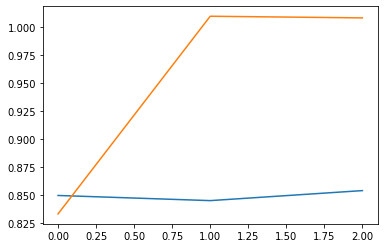

In [74]:
plt.plot(owas)
plt.plot(owas_internal)